# Cifar-10 이미지 분류 - v1

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

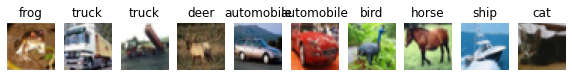

In [5]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i,0]])
plt.show()

In [6]:
# X_data: scaling
X_train = X_train/255.
X_test = X_test/255.

In [7]:
# y_data: one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [9]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [10]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [14]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100,
    batch_size=32, callbacks=[mc,es]
)

Epoch 1/100
1239/1250 [============================>.] - ETA: 0s - loss: 1.8882 - accuracy: 0.3034
Epoch 1: val_loss improved from inf to 1.63625, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 19s 6ms/step - loss: 1.8863 - accuracy: 0.3041 - val_loss: 1.6363 - val_accuracy: 0.4030
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.5888 - accuracy: 0.4190
Epoch 2: val_loss improved from 1.63625 to 1.45578, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5886 - accuracy: 0.4191 - val_loss: 1.4558 - val_accuracy: 0.4753
Epoch 3/100
1245/1250 [============================>.] - ETA: 0s - loss: 1.4602 - accuracy: 0.4688
Epoch 3: val_loss improved from 1.45578 to 1.34644, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4599 - accuracy: 0.4691 - val_loss: 1.3464 - val_accuracy: 0.5231
Epoch 4/100
1245/1250 [=======================

In [15]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6565 - accuracy: 0.7796


[0.6565040946006775, 0.7796000242233276]

- 학습과정 시각화

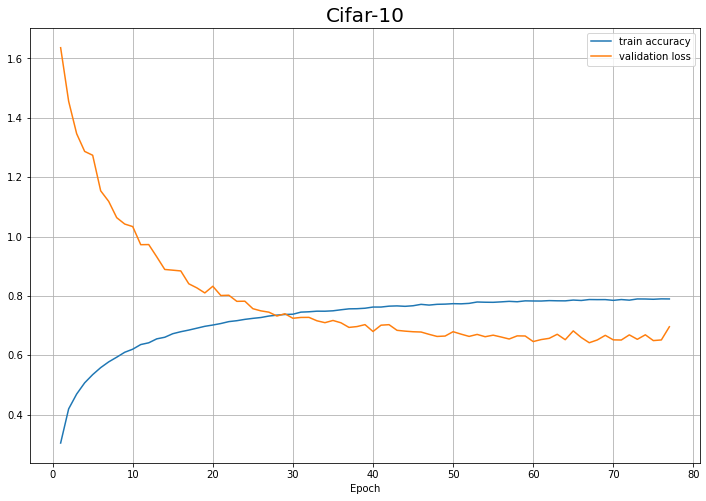

In [16]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.title('Cifar-10', size=20)
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()